In [8]:
import networkx as nx
import numpy as np

def generate_percolation_data(n, p):
    # Create a random graph
    G = nx.erdos_renyi_graph(n, p)

    # Generate percolation data
    percolation_data = []
    for i in range(n):
        # Remove node i from the graph
        G_copy = G.copy()
        G_copy.remove_node(i)

        # Check if the graph is still connected
        is_connected = nx.is_connected(G_copy)

        # Append the percolation data
        percolation_data.append(is_connected)

    return percolation_data

# Example usage
n = 10  # Number of nodes
p = 0.3  # Probability of an edge between two nodes
percolation_data = generate_percolation_data(n, p)
print(percolation_data)



[True, True, True, True, True, True, True, True, True, True]


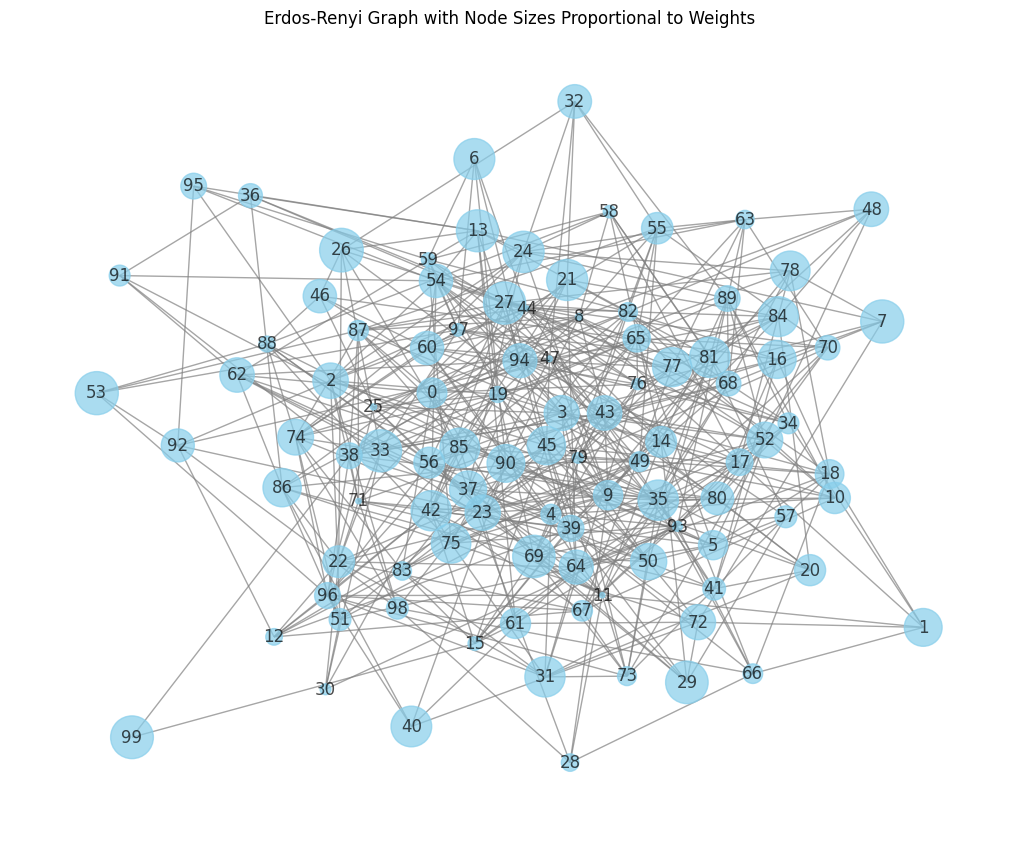

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of nodes
p = 0.1  # Probability of edge creation

# Generate Erdos-Renyi graph
G = nx.erdos_renyi_graph(n, p)

# Assign random weights or sizes to nodes
weights = np.random.rand(n)
sizes = weights * 1000  # Scale sizes for better visualization

# Add weights to nodes as an attribute
for i, weight in enumerate(weights):
    G.nodes[i]['weight'] = weight

# Draw the graph with node sizes proportional to weights
pos = nx.spring_layout(G)  # Layout for better visualization
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_size=sizes, with_labels=True, node_color='skyblue', edge_color='gray', alpha=0.7)
plt.title("Erdos-Renyi Graph with Node Sizes Proportional to Weights")
plt.show()

Node 55 and Node 1 are connected in the graph.


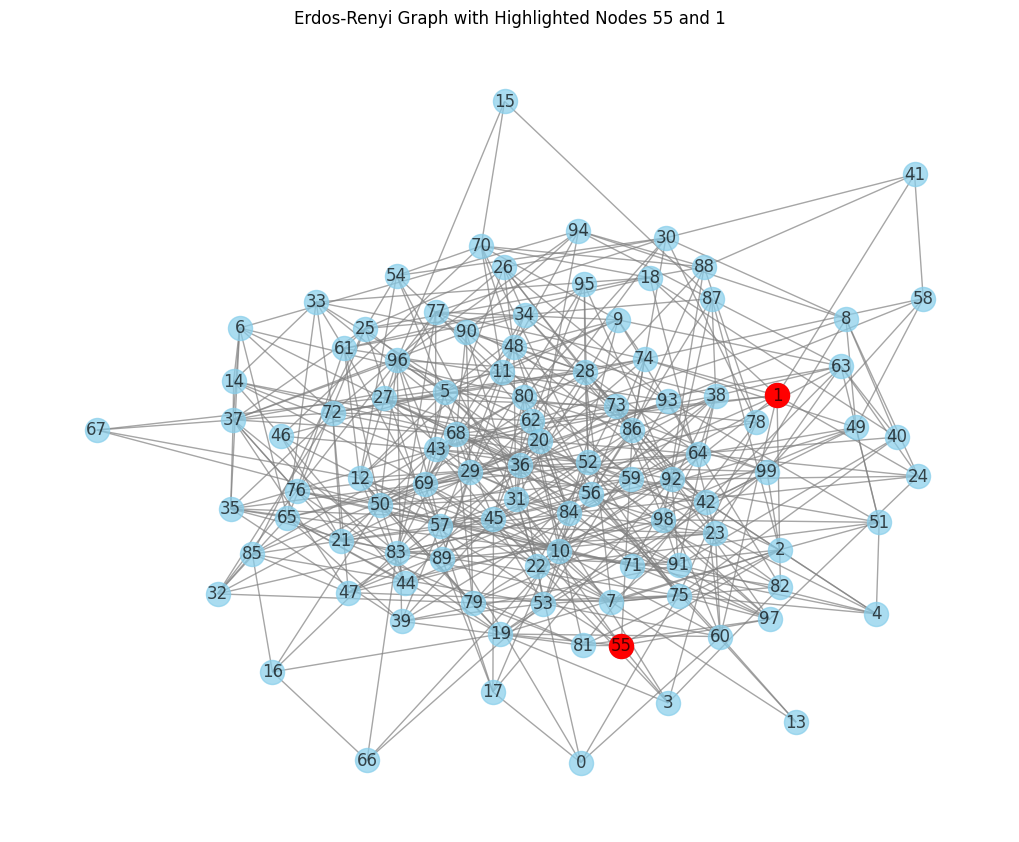

In [5]:
import networkx as nx
import numpy as np

# Parameters
n = 100  # Number of nodes
p = 0.1  # Probability of edge creation

# Generate Erdos-Renyi graph
G = nx.erdos_renyi_graph(n, p)

# Select two random nodes to check for percolation
node1 = np.random.choice(G.nodes())
node2 = np.random.choice(G.nodes())

# Check if there is a path between node1 and node2
connected = nx.has_path(G, node1, node2)

# Output the result
print(f"Node {node1} and Node {node2} are {'connected' if connected else 'not connected'} in the graph.")

# Optional: Visualize the graph and highlight the two nodes
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_color='skyblue', edge_color='gray', alpha=0.7, with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=[node1, node2], node_color='red')
plt.title(f"Erdos-Renyi Graph with Highlighted Nodes {node1} and {node2}")
plt.show()


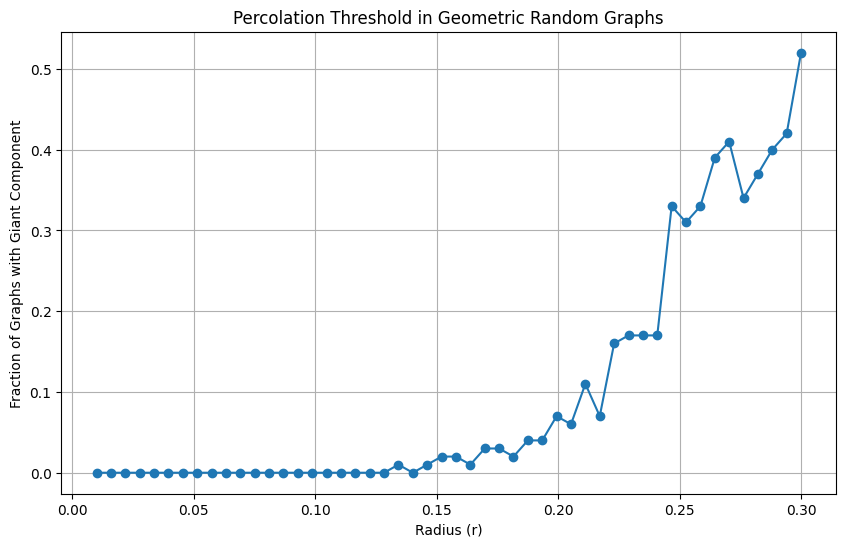

Estimated percolation threshold: 0.300


In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100  # Number of nodes
radius = 0.1  # Radius for connecting nodes
num_trials = 100  # Number of trials to estimate the percolation threshold

# Function to generate a geometric random graph
def generate_geometric_graph(n, radius):
    G = nx.random_geometric_graph(n, radius)
    return G

# Function to check if a giant component exists in the graph
def has_giant_component(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc) / n > 0.5  # Giant component threshold (more than 50% of nodes)

# Record the fraction of graphs with a giant component for each radius
giant_component_results = []

radii = np.linspace(0.01, 0.3, 50)  # Range of radii

for r in radii:
    giant_component_count = 0
    for _ in range(num_trials):
        G = generate_geometric_graph(n, r)
        if has_giant_component(G):
            giant_component_count += 1
    giant_component_results.append(giant_component_count / num_trials)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(radii, giant_component_results, marker='o')
plt.xlabel('Radius (r)')
plt.ylabel('Fraction of Graphs with Giant Component')
plt.title('Percolation Threshold in Geometric Random Graphs')
plt.grid(True)
plt.show()

# Estimate the percolation threshold
threshold_index = np.where(np.array(giant_component_results) >= 0.5)[0][0]
approx_threshold = radii[threshold_index]
print(f"Estimated percolation threshold: {approx_threshold:.3f}")
